In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
import os

In [3]:
os.listdir('./')

['.ipynb_checkpoints',
 'boston_housing.ipynb',
 'data_description.txt',
 'housedata.csv',
 'my_boston_housing_project.ipynb',
 'README.md',
 'visuals.py']

In [4]:
house_data = pd.read_csv('./housedata.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
y_data = house_data.SalePrice
X_data = house_data.drop(['Id', 'SalePrice'], axis=1)
print(y_data.head())
print(X_data.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  Y

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [133]:
X_train['LotArea'].head()

311     8000
122     9464
934    27650
756    10769
267     8400
Name: LotArea, dtype: int64

In [12]:
print (y_test.shape)
print (X_train.shape)

(292,)
(1168, 79)


In [56]:
for col in X_train.columns:
    nan_count = X_train[X_train[col].isna()].shape[0]
    if nan_count:
        print('col {} NaN {}'.format(col, nan_count/X_train.shape[0]))

col LotFrontage NaN 0.1840753424657534
col Alley NaN 0.9357876712328768
col MasVnrType NaN 0.005136986301369863
col MasVnrArea NaN 0.005136986301369863
col BsmtQual NaN 0.023116438356164382
col BsmtCond NaN 0.023116438356164382
col BsmtExposure NaN 0.023972602739726026
col BsmtFinType1 NaN 0.023116438356164382
col BsmtFinType2 NaN 0.023116438356164382
col FireplaceQu NaN 0.4785958904109589
col GarageType NaN 0.05393835616438356
col GarageYrBlt NaN 0.05393835616438356
col GarageFinish NaN 0.05393835616438356
col GarageQual NaN 0.05393835616438356
col GarageCond NaN 0.05393835616438356
col PoolQC NaN 0.9948630136986302
col Fence NaN 0.8090753424657534
col MiscFeature NaN 0.9631849315068494


In [59]:
X_train.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
449,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,12,2008,New,Partial
74,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
255,60,RL,66.0,8738,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1253,60,RL,NaN,17542,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal
1048,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal
630,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml
164,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
1368,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [60]:
y_train.head(10)

449     120000
973     182000
74      107400
255     230000
1253    294000
1048    115000
630     124000
88       85000
164     152000
1368    144000
Name: SalePrice, dtype: int64

In [68]:
X_train.LotArea.mean()

10622.152397260274

In [ ]:
'EnclosedPorch', 'LotFrontage'

In [134]:
for col in X_train.columns:
    #if col.find(['SF', 'Area', 'EnclosedPorch', 'LotFrontage']):
    if 'SF' in col or 'Area' in col or 'EnclosedPorch' in col or 'LotFrontage' in col:
        X_train.loc[:, col] = (X_train[col] - X_train[col].min()) / (X_train[col].max() - X_train[col].min())

In [138]:
X_train['LotArea'].head()

311    0.031316
122    0.038159
934    0.123162
756    0.044259
267    0.033186
Name: LotArea, dtype: float64

In [152]:
temp = (X_data['LotArea'] - X_data['LotArea'].min()) / (X_data['LotArea'].max() - X_data['LotArea'].min())

In [153]:
temp.head()

0    0.033420
1    0.038795
2    0.046507
3    0.038561
4    0.060576
Name: LotArea, dtype: float64

In [154]:
temp2 = (y_data - y_data.min()) / (y_data.max() - y_data.min())

In [155]:
temp2.head()

0    0.241078
1    0.203583
2    0.261908
3    0.145952
4    0.298709
Name: SalePrice, dtype: float64

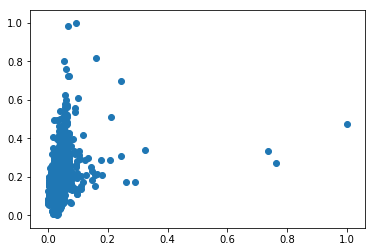

In [89]:
import matplotlib.pyplot as plt
plt.scatter(temp, temp2)

In [145]:
import seaborn as sns
sns.set(style='darkgrid')

In [156]:
print(temp.shape)
print(temp2.shape)

(1460,)
(1460,)


In [157]:
sns.relplot(temp, temp2)

TypeError: object of type 'NoneType' has no len()

In [146]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.